#Tugas Capstone Bengkel Koding
##Nama : Syallom Christian
##NIM  : A11.2022.14384

Link file all : https://drive.google.com/drive/folders/1b5TbkWHwxtVNNOFI72Z9qYzi8ObxFzeK?usp=sharing

Link github   : https://github.com/syallomchristian/Capstone_Project_BengKod_DataScience

## Informasi Fitur Dataset

- Gender : Fitur, Kategorikal — "Jenis kelamin"
- Age : Fitur, Kontinu — "Usia"
- Height : Fitur, Kontinu — "Tinggi badan"
- Weight : Fitur, Kontinu — "Berat badan"
- family_history_with_overweight : Fitur, Biner — "Apakah ada anggota keluarga yang pernah atau sedang mengalami kelebihan berat badan?"
- FAVC : Fitur, Biner — "Apakah Anda sering mengonsumsi makanan tinggi kalori?"
- FCVC : Fitur, Integer — "Apakah Anda biasanya makan sayuran dalam setiap kali makan?"
- NCP : Fitur, Kontinu — "Berapa kali Anda makan besar dalam sehari?"
- CAEC : Fitur, Kategorikal — "Apakah Anda makan camilan di antara waktu makan?"
- SMOKE : Fitur, Biner — "Apakah Anda merokok?"
- CH2O : Fitur, Kontinu — "Berapa banyak air yang Anda minum setiap hari?"
- SCC : Fitur, Biner — "Apakah Anda memantau asupan kalori harian Anda?"
- FAF : Fitur, Kontinu — "Seberapa sering Anda melakukan aktivitas fisik?"
- TUE : Fitur, Integer — "Berapa lama Anda menggunakan perangkat teknologi seperti ponsel, video game, televisi, komputer, dan lainnya?"
- CALC : Fitur, Kategorikal — "Seberapa sering Anda mengonsumsi alkohol?"
- MTRANS : Fitur, Kategorikal — "Jenis transportasi apa yang biasa Anda gunakan?"
- NObeyesdad : Target, Kategorikal — "Tingkat obesitas"


##1. Import Lib

In [229]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_selection import mutual_info_classif

##2. Import Dataset

In [230]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import sys
sys.path.append('/content/drive/My Drive/Project_CAPSTONE_BengKod')

df = pd.read_csv('/content/drive/My Drive/Project_CAPSTONE_BengKod/ObesityDataSet.csv')


Mounted at /content/drive


In [231]:
df.info()
df.head()

# Cek distribusi kelas
print(df['NObeyesdad'].value_counts())
print("\nProporsi kelas:")
print(df['NObeyesdad'].value_counts(normalize=True))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             2097 non-null   object
 1   Gender                          2102 non-null   object
 2   Height                          2099 non-null   object
 3   Weight                          2100 non-null   object
 4   CALC                            2106 non-null   object
 5   FAVC                            2100 non-null   object
 6   FCVC                            2103 non-null   object
 7   NCP                             2099 non-null   object
 8   SCC                             2101 non-null   object
 9   SMOKE                           2106 non-null   object
 10  CH2O                            2105 non-null   object
 11  family_history_with_overweight  2098 non-null   object
 12  FAF                             2103 non-null   

##3. EDA

In [232]:
# Ringkasan informasi dataset
info = df.info()

# Cek nilai yang hilang
missing_values = df.isnull().sum()

# Statistik deskriptif untuk kolom numerik
desc_stats = df.describe()

info, missing_values, desc_stats


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             2097 non-null   object
 1   Gender                          2102 non-null   object
 2   Height                          2099 non-null   object
 3   Weight                          2100 non-null   object
 4   CALC                            2106 non-null   object
 5   FAVC                            2100 non-null   object
 6   FCVC                            2103 non-null   object
 7   NCP                             2099 non-null   object
 8   SCC                             2101 non-null   object
 9   SMOKE                           2106 non-null   object
 10  CH2O                            2105 non-null   object
 11  family_history_with_overweight  2098 non-null   object
 12  FAF                             2103 non-null   

(None,
 Age                               14
 Gender                             9
 Height                            12
 Weight                            11
 CALC                               5
 FAVC                              11
 FCVC                               8
 NCP                               12
 SCC                               10
 SMOKE                              5
 CH2O                               6
 family_history_with_overweight    13
 FAF                                8
 TUE                                9
 CAEC                              11
 MTRANS                             6
 NObeyesdad                         0
 dtype: int64,
          Age Gender Height Weight       CALC  FAVC  FCVC   NCP   SCC SMOKE  \
 count   2097   2102   2099   2100       2106  2100  2103  2099  2101  2106   
 unique  1394      3   1562   1518          5     3   808   637     3     3   
 top       18   Male    1.7     80  Sometimes   yes     3     3    no    no   
 freq     124   

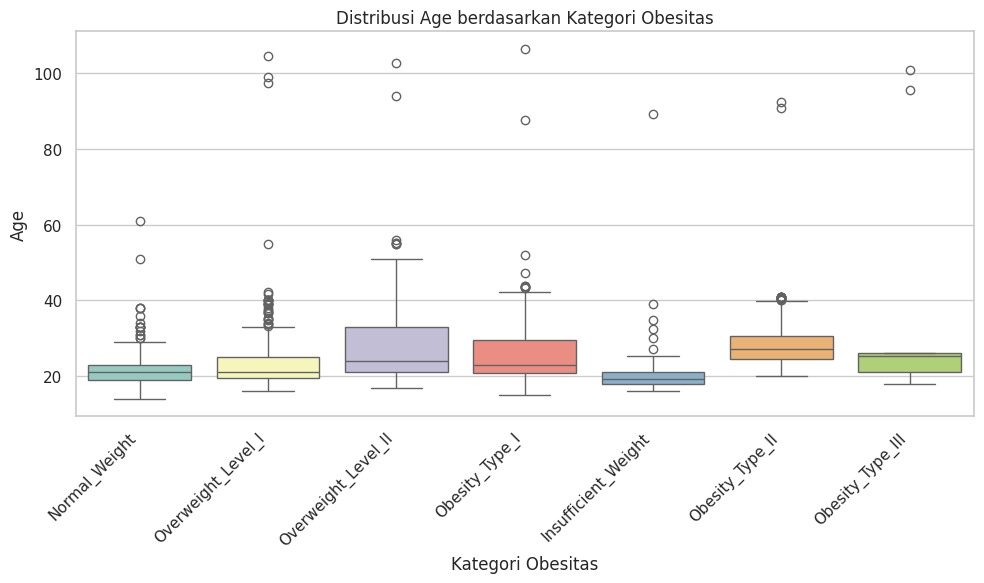

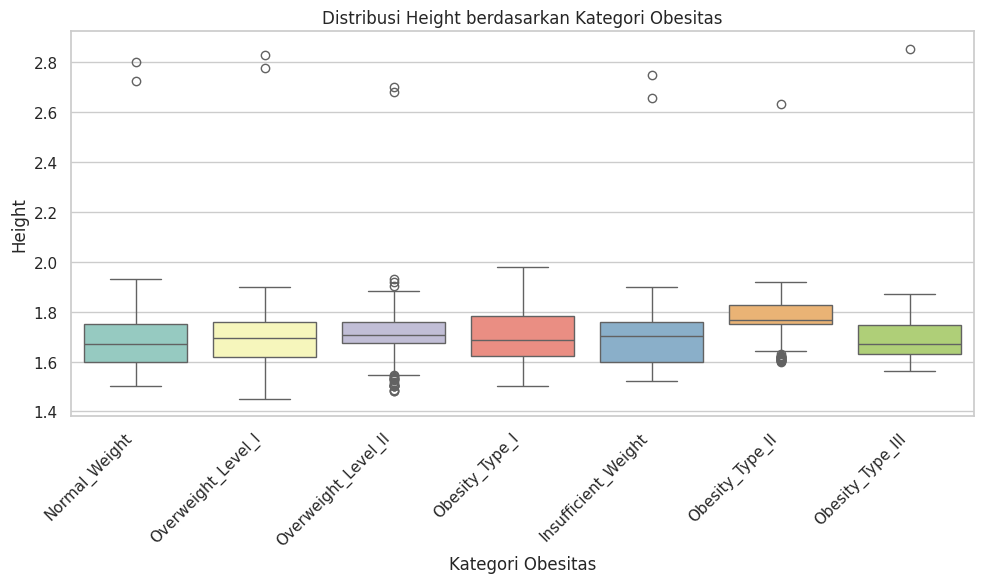

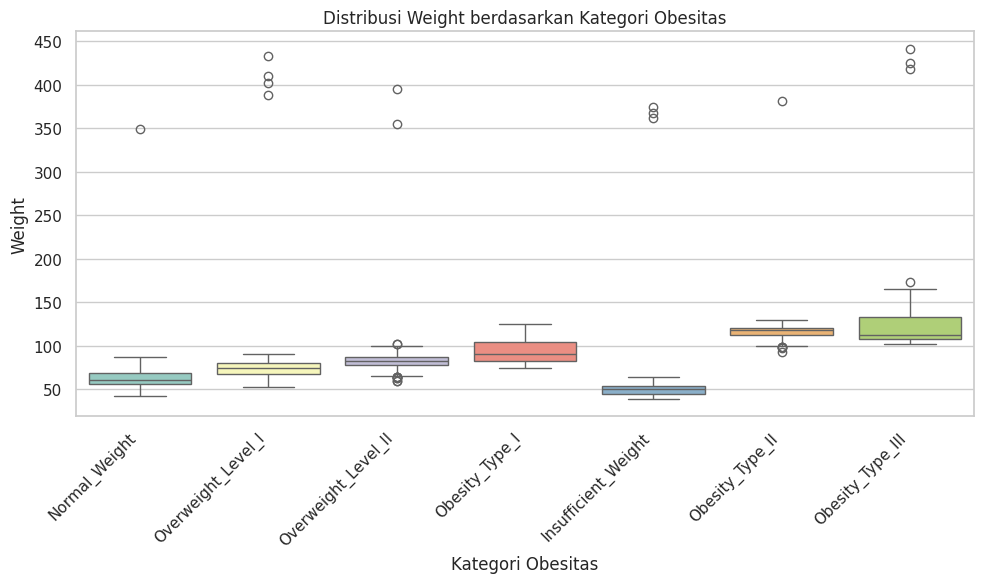

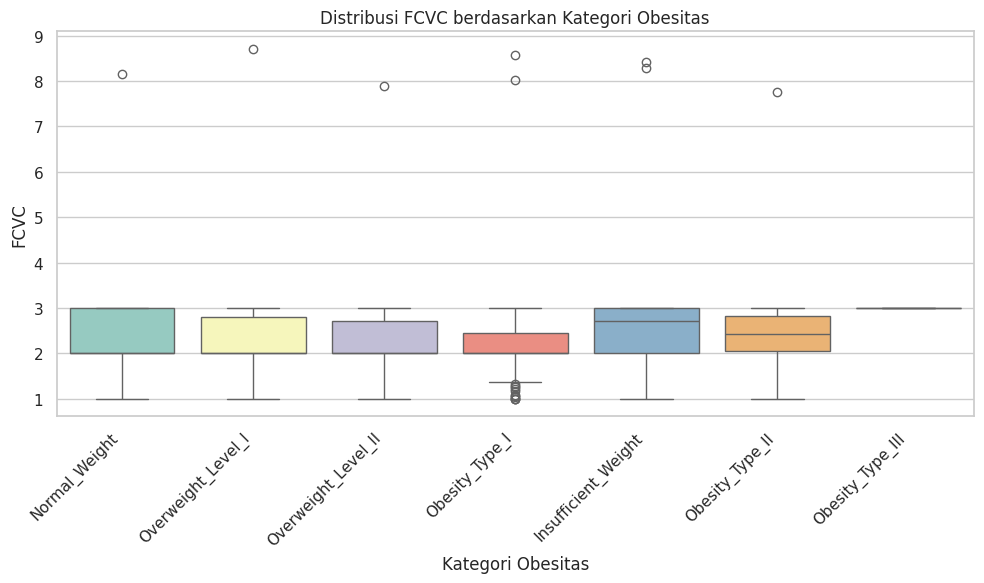

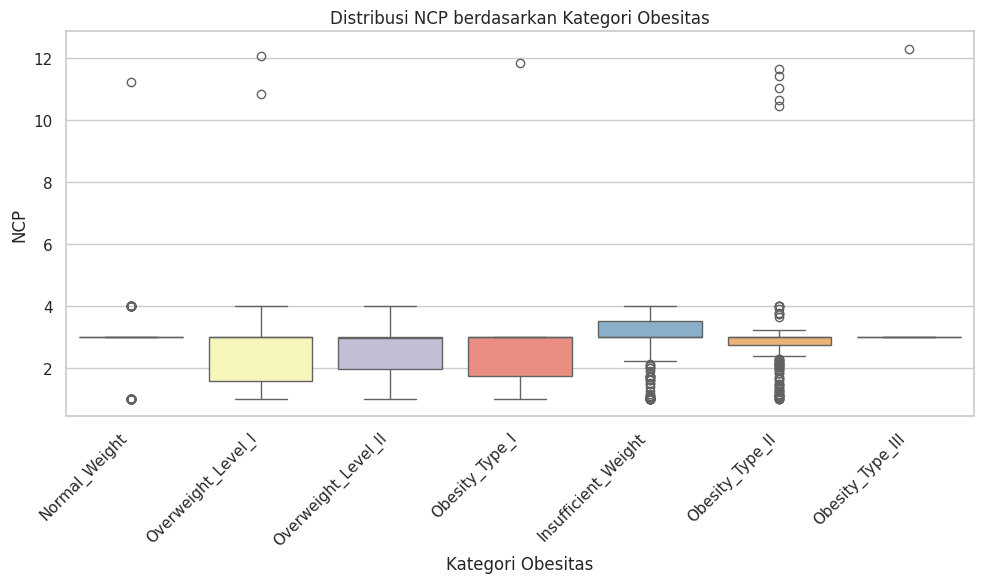

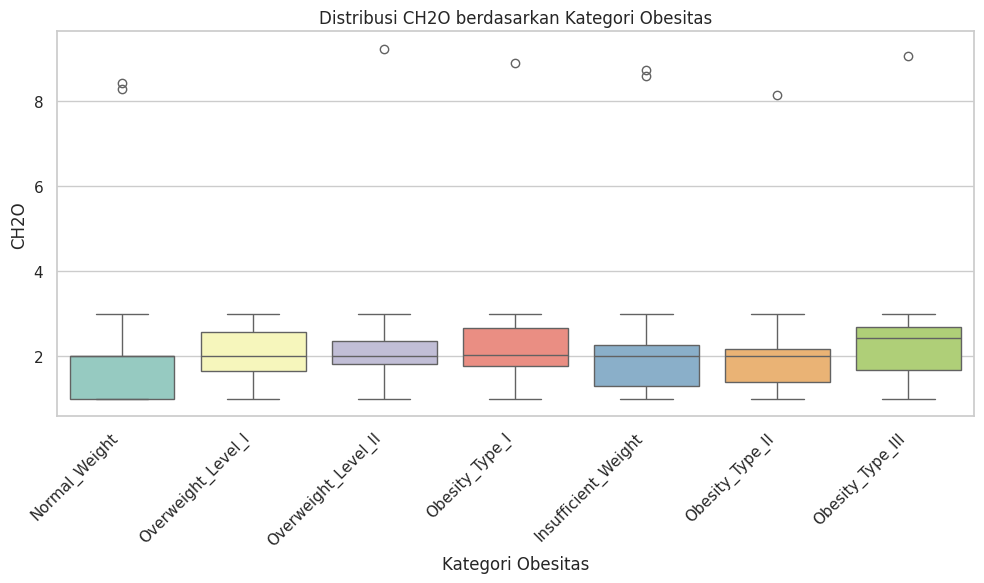

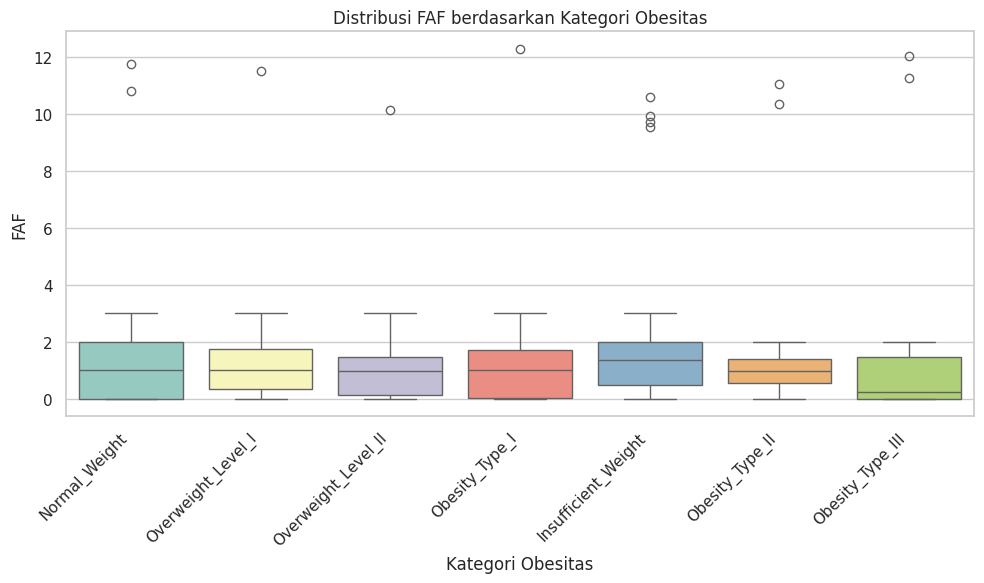

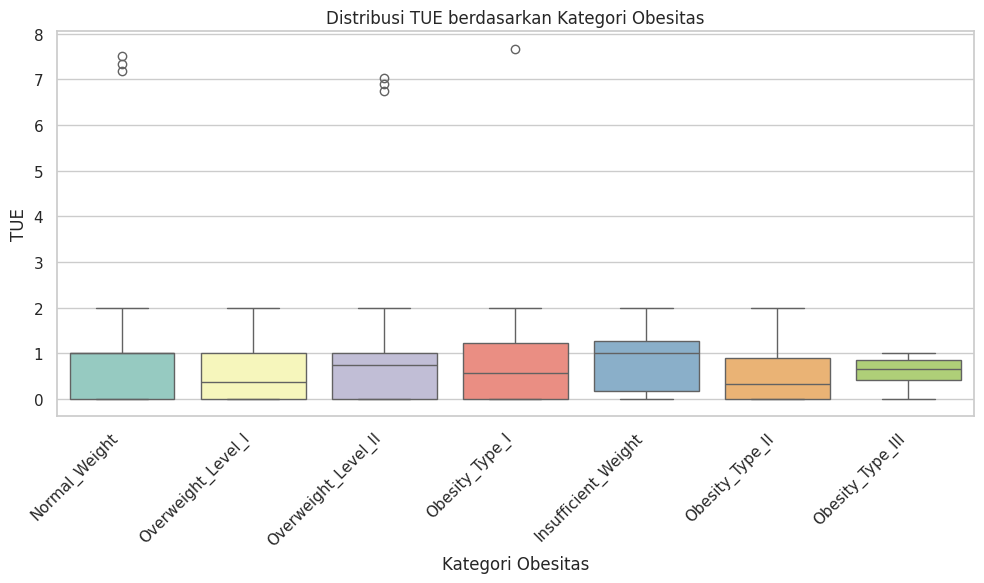

In [233]:
numerical_columns = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# Ubah nilai tidak valid menjadi NaN pada kolom numerik
for col in numerical_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Hapus NaN
df_cleaned = df.dropna(subset=numerical_columns + ['NObeyesdad']) # Hapus baris dengan NaN di kolom numerik atau target

# Buat boxplot
sns.set_theme(style="whitegrid")
for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='NObeyesdad', y=col, hue='NObeyesdad', data=df_cleaned, palette='Set3', legend=False)
    plt.title(f'Distribusi {col} berdasarkan Kategori Obesitas')
    plt.xlabel('Kategori Obesitas')
    plt.ylabel(col)
    plt.xticks(rotation=45, ha='right')      # Putar dan rapikan label
    plt.subplots_adjust(bottom=0.25)         # Tambah jarak bawah agar tidak bertabrakan
    plt.tight_layout()
    plt.show()

In [234]:
# Cek missing values per kolom
missing_values = df.isnull().sum()
#print("Jumlah Missing Values per Kolom:\n", missing_values)
print(missing_values)

Age                               22
Gender                             9
Height                            22
Weight                            19
CALC                               5
FAVC                              11
FCVC                              18
NCP                               22
SCC                               10
SMOKE                              5
CH2O                              15
family_history_with_overweight    13
FAF                               19
TUE                               15
CAEC                              11
MTRANS                             6
NObeyesdad                         0
dtype: int64


In [235]:
# Cek unique values per kolom
unique_values = df.nunique()
print("\nJumlah Unique Values per Kolom:\n", unique_values)



Jumlah Unique Values per Kolom:
 Age                               1393
Gender                               3
Height                            1561
Weight                            1517
CALC                                 5
FAVC                                 3
FCVC                               807
NCP                                636
SCC                                  3
SMOKE                                3
CH2O                              1262
family_history_with_overweight       3
FAF                               1185
TUE                               1129
CAEC                                 5
MTRANS                               6
NObeyesdad                           7
dtype: int64


In [236]:
print("\nUnique values pada semua kolom:")
for col in df.columns:
    print(f"- {col}: {df[col].unique()}")



Unique values pada semua kolom:
- Age: [21.       23.       27.       ... 22.524036 24.361936 23.664709]
- Gender: ['Female' 'Male' '?' nan]
- Height: [1.62     1.52     1.8      ... 1.752206 1.73945  1.738836]
- Weight: [ 64.        56.        77.       ... 133.689352 133.346641 133.472641]
- CALC: ['no' 'Sometimes' 'Frequently' '?' 'Always' nan]
- FAVC: ['no' 'yes' '?' nan]
- FCVC: [2.         3.         1.                nan 8.14899274 8.42397393
 2.450218   2.880161   2.00876    2.596579   2.591439   2.392665
 1.123939   2.027574   2.658112   2.88626    2.714447   2.750715
 1.4925     2.205439   2.059138   2.310423   2.823179   2.052932
 2.596364   2.767731   2.815157   2.737762   2.524428   2.971574
 1.0816     1.270448   1.344854   2.959658   2.725282   2.844607
 2.44004    2.432302   2.592247   2.449267   2.929889   2.015258
 1.031149   1.592183   1.21498    1.522001   2.703436   2.362918
 2.14084    2.5596     2.336044   1.813234   2.724285   2.71897
 1.133844   1.757466   2.9

In [237]:
# Cek data duplikat
# Jumlah total baris duplikat (seluruh baris sama persis)
total_duplikat = df.duplicated().sum()
print("Total baris duplikat:", total_duplikat)
print("--------------------------------")

# Tampilkan baris yang terduplikat
duplikat = df[df.duplicated()]
print("Baris duplikat:")
print(duplikat)

# Ambil satu contoh baris duplikat
if not duplikat.empty:
    ref = duplikat.iloc[0]
    matching_cols = df.columns[(df == ref).all(axis=0)]
    print("Kolom yang identik di baris duplikat contoh:", list(matching_cols))


Total baris duplikat: 18
--------------------------------
Baris duplikat:
      Age  Gender  Height  Weight       CALC FAVC  FCVC  NCP SCC SMOKE  CH2O  \
98   21.0  Female    1.52    42.0  Sometimes   no   3.0  1.0  no    no   1.0   
174  21.0    Male    1.62    70.0  Sometimes  yes   2.0  1.0  no    no   3.0   
179  21.0    Male    1.62    70.0  Sometimes  yes   2.0  1.0  no    no   3.0   
184  21.0    Male    1.62    70.0  Sometimes  yes   2.0  1.0  no    no   3.0   
309  16.0  Female    1.66    58.0         no   no   2.0  1.0  no    no   1.0   
460  18.0  Female    1.62    55.0         no  yes   2.0  3.0  no    no   1.0   
663  21.0  Female    1.52    42.0  Sometimes  yes   3.0  1.0  no    no   1.0   
763  21.0    Male    1.62    70.0  Sometimes  yes   2.0  1.0  no    no   3.0   
764  21.0    Male    1.62    70.0  Sometimes  yes   2.0  1.0  no    no   3.0   
824  21.0    Male    1.62    70.0  Sometimes  yes   2.0  1.0  no    no   3.0   
830  21.0    Male    1.62    70.0  Sometimes  


Distribusi Keseimbangan Data (NObeyesdad):
 NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64


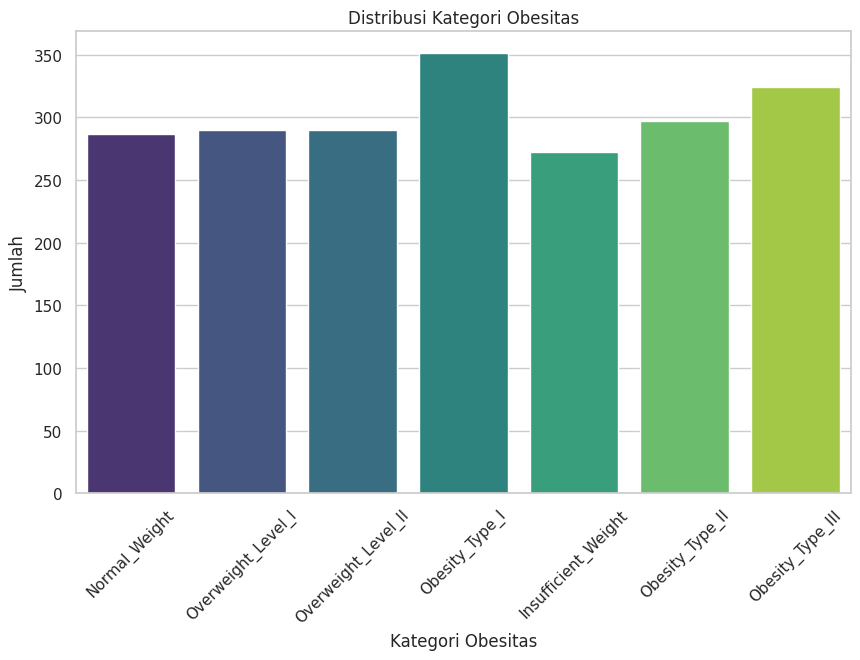

In [238]:
# Cek keseimbangan data pada kolom target 'NObeyesdad'
class_distribution = df['NObeyesdad'].value_counts()
print("\nDistribusi Keseimbangan Data (NObeyesdad):\n", class_distribution)


plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='NObeyesdad', hue='NObeyesdad', palette='viridis', legend=False)
plt.title('Distribusi Kategori Obesitas')
plt.xlabel('Kategori Obesitas')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.show()

<ipython-input-239-139b094f1198>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pair', y='Correlation', data=correlation_data, palette='viridis')


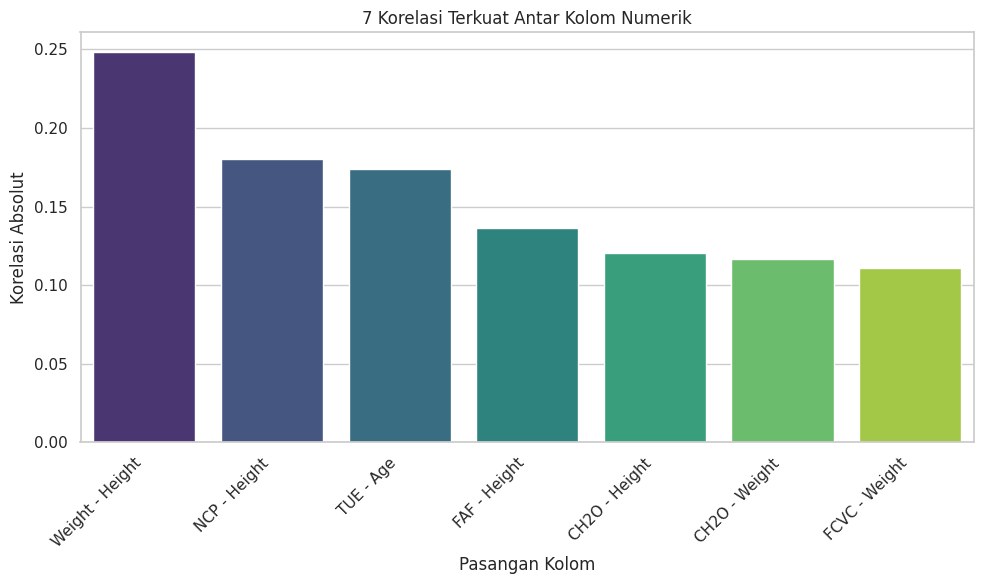

In [239]:
# Konversi kolom numerik ke tipe data numerik
for col in numerical_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Hapus baris dengan missing values di kolom numerik
df_cleaned = df.dropna(subset=numerical_columns)

# Hitung matriks korelasi
correlation_matrix = df_cleaned[numerical_columns].corr()

# Ambil nilai korelasi absolut dan urutkan
abs_corr_matrix = np.abs(correlation_matrix)
upper_triangle = abs_corr_matrix.where(np.triu(np.ones(abs_corr_matrix.shape), k=1).astype(bool))
strong_correlations = upper_triangle.unstack().sort_values(ascending=False)
strong_correlations = strong_correlations.dropna()  # Hapus NaN

# Pilih 7 korelasi teratas
top_7_correlations = strong_correlations.head(7)

# Siapkan data untuk diagram batang
correlation_data = pd.DataFrame({
    'Pair': [f"{pair[0]} - {pair[1]}" for pair in top_7_correlations.index],
    'Correlation': top_7_correlations.values
})

# Visualisasikan dalam diagram batang
plt.figure(figsize=(10, 6))
sns.barplot(x='Pair', y='Correlation', data=correlation_data, palette='viridis')
plt.title('7 Korelasi Terkuat Antar Kolom Numerik')
plt.xlabel('Pasangan Kolom')
plt.ylabel('Korelasi Absolut')
plt.xticks(rotation=45, ha='right')  # Rotasi label sumbu x agar terbaca
plt.tight_layout()  # Untuk mencegah label tumpang tindih
plt.show()

###  **Top 7 Korelasi Tertinggi (dalam nilai absolut)**

| Pasangan Fitur       | Korelasi | Analisis                                                                 |
|----------------------|----------|--------------------------------------------------------------------------|
| **Weight – Height**  | 0.248    | Positif lemah: Orang dengan tinggi badan lebih besar cenderung memiliki berat lebih tinggi, meskipun hubungan ini tidak terlalu kuat. |
| **NCP – Height**     | 0.180    | Korelasi lemah: Orang dengan tinggi tertentu cenderung memiliki pola makan besar tertentu, tetapi korelasinya lemah. |
| **TUE – Age**        | 0.174    | Korelasi lemah: Usia memengaruhi durasi penggunaan teknologi; kemungkinan, kelompok usia muda cenderung lebih banyak menggunakan perangkat. |
| **FAF – Height**     | 0.136    | Korelasi sangat lemah: Tinggi badan sedikit berkorelasi dengan aktivitas fisik, bisa jadi orang lebih tinggi lebih aktif secara umum. |
| **CH2O – Height**    | 0.121    | Korelasi sangat lemah: Tinggi badan sedikit berkaitan dengan konsumsi air harian, tetapi tidak signifikan. |
| **CH2O – Weight**    | 0.117    | Korelasi sangat lemah: Berat badan memiliki sedikit hubungan dengan konsumsi air, tetapi tidak cukup kuat untuk disimpulkan. |
| **FCVC – Weight**    | 0.111    | Korelasi sangat lemah: Konsumsi sayuran berkaitan sedikit dengan berat badan; bisa berarti diet sehat sedikit mempengaruhi berat. |



###  **Kesimpulan Analisis Korelasi**

- Tidak ada korelasi yang **kuat** antar fitur numerik (semuanya < 0.3).
- Korelasi tertinggi pun (`Weight – Height`) hanya 0.25, yang termasuk **lemah**.
- Ini menunjukkan bahwa **tidak ada dua fitur numerik** dalam dataset ini yang sangat linear satu sama lain.
- Hal ini baik untuk pemodelan, karena tidak ada multikolinearitas tinggi yang bisa merusak performa model prediktif berbasis regresi atau pohon keputusan.


##Preprocessing Data

In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2089 non-null   float64
 1   Gender                          2102 non-null   object 
 2   Height                          2089 non-null   float64
 3   Weight                          2092 non-null   float64
 4   CALC                            2106 non-null   object 
 5   FAVC                            2100 non-null   object 
 6   FCVC                            2093 non-null   float64
 7   NCP                             2089 non-null   float64
 8   SCC                             2101 non-null   object 
 9   SMOKE                           2106 non-null   object 
 10  CH2O                            2096 non-null   float64
 11  family_history_with_overweight  2098 non-null   object 
 12  FAF                             20

In [241]:
#cek fitur kategorikal
fitur_kategorikal = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']

for fitur in fitur_kategorikal:
    print(f"\nUnique values pada kolom '{fitur}':")
    print(df[fitur].unique())



Unique values pada kolom 'Gender':
['Female' 'Male' '?' nan]

Unique values pada kolom 'family_history_with_overweight':
['yes' 'no' nan '?']

Unique values pada kolom 'FAVC':
['no' 'yes' '?' nan]

Unique values pada kolom 'CAEC':
['Sometimes' 'Frequently' 'Always' 'no' nan '?']

Unique values pada kolom 'SMOKE':
['no' 'yes' '?' nan]

Unique values pada kolom 'SCC':
['no' 'yes' nan '?']

Unique values pada kolom 'CALC':
['no' 'Sometimes' 'Frequently' '?' 'Always' nan]

Unique values pada kolom 'MTRANS':
['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike' '?' nan]

Unique values pada kolom 'NObeyesdad':
['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']


test

In [242]:
for col in df.columns:
    print(f"\nUnique values pada kolom '{col}':")
    print(df[col].unique())



Unique values pada kolom 'Age':
[21.       23.       27.       ... 22.524036 24.361936 23.664709]

Unique values pada kolom 'Gender':
['Female' 'Male' '?' nan]

Unique values pada kolom 'Height':
[1.62     1.52     1.8      ... 1.752206 1.73945  1.738836]

Unique values pada kolom 'Weight':
[ 64.        56.        77.       ... 133.689352 133.346641 133.472641]

Unique values pada kolom 'CALC':
['no' 'Sometimes' 'Frequently' '?' 'Always' nan]

Unique values pada kolom 'FAVC':
['no' 'yes' '?' nan]

Unique values pada kolom 'FCVC':
[2.         3.         1.                nan 8.14899274 8.42397393
 2.450218   2.880161   2.00876    2.596579   2.591439   2.392665
 1.123939   2.027574   2.658112   2.88626    2.714447   2.750715
 1.4925     2.205439   2.059138   2.310423   2.823179   2.052932
 2.596364   2.767731   2.815157   2.737762   2.524428   2.971574
 1.0816     1.270448   1.344854   2.959658   2.725282   2.844607
 2.44004    2.432302   2.592247   2.449267   2.929889   2.015258
 1.031

In [243]:
gender_map = {
    'Female': 0,
    'Male': 1
}

family_history_map = {
    'no': 0,
    'yes': 1
}

favc_map = {
    'no': 0,
    'yes': 1
}

caec_map = {
    'no': 0,
    'Sometimes': 1,
    'Frequently': 2,
    'Always': 3
}

smoke_map = {
    'no': 0,
    'yes': 1
}

scc_map = {
    'no': 0,
    'yes': 1
}

calc_map = {
    'no': 0,
    'Sometimes': 1,
    'Frequently': 2,
    'Always': 3
}

mtrans_map = {
    'Public_Transportation': 0,
    'Walking': 1,
    'Automobile': 2,
    'Motorbike': 3,
    'Bike': 4
}

nobeyesdad_map = {
    'Insufficient_Weight': 0,
    'Normal_Weight': 1,
    'Overweight_Level_I': 2,
    'Overweight_Level_II': 3,
    'Obesity_Type_I': 4,
    'Obesity_Type_II': 5,
    'Obesity_Type_III': 6
}


df['Gender'] = df['Gender'].map(gender_map)
df['family_history_with_overweight'] = df['family_history_with_overweight'].map(family_history_map)
df['FAVC'] = df['FAVC'].map(favc_map)
df['CAEC'] = df['CAEC'].map(caec_map)
df['SMOKE'] = df['SMOKE'].map(smoke_map)
df['SCC'] = df['SCC'].map(scc_map)
df['CALC'] = df['CALC'].map(calc_map)
df['MTRANS'] = df['MTRANS'].map(mtrans_map)
df['NObeyesdad'] = df['NObeyesdad'].map(nobeyesdad_map)

print("\nDataFrame setelah Label Encoding:")
print(df.head())
'''
# Identifikasi kolom kategorikal dan target
categorical_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']
target_col = 'NObeyesdad'

# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Terapkan Label Encoding pada setiap kolom kategorikal
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Terapkan Label Encoding pada kolom target
df[target_col] = label_encoder.fit_transform(df[target_col])


# Tampilkan info DataFrame setelah encoding untuk memastikan perubahan
df.info()

# Tampilkan beberapa baris pertama untuk melihat hasil encoding
print("\nDataFrame setelah Label Encoding:")
print(df.head())
'''


DataFrame setelah Label Encoding:
    Age  Gender  Height  Weight  CALC  FAVC  FCVC  NCP  SCC  SMOKE  CH2O  \
0  21.0     0.0    1.62    64.0   0.0   0.0   2.0  3.0  0.0    0.0   2.0   
1  21.0     0.0    1.52    56.0   1.0   0.0   3.0  3.0  1.0    1.0   3.0   
2  23.0     1.0    1.80    77.0   2.0   0.0   2.0  3.0  0.0    0.0   2.0   
3  27.0     1.0    1.80    87.0   2.0   0.0   3.0  3.0  0.0    0.0   2.0   
4  22.0     1.0    1.78    89.8   1.0   0.0   2.0  1.0  0.0    0.0   2.0   

   family_history_with_overweight  FAF  TUE  CAEC  MTRANS  NObeyesdad  
0                             1.0  0.0  1.0   1.0     0.0           1  
1                             1.0  3.0  0.0   1.0     0.0           1  
2                             1.0  2.0  1.0   1.0     0.0           1  
3                             0.0  2.0  0.0   1.0     1.0           2  
4                             0.0  0.0  0.0   1.0     0.0           3  


'\n# Identifikasi kolom kategorikal dan target\ncategorical_cols = [\'Gender\', \'family_history_with_overweight\', \'FAVC\', \'CAEC\', \'SMOKE\', \'SCC\', \'CALC\', \'MTRANS\']\ntarget_col = \'NObeyesdad\'\n\n# Inisialisasi LabelEncoder\nlabel_encoder = LabelEncoder()\n\n# Terapkan Label Encoding pada setiap kolom kategorikal\nfor col in categorical_cols:\n    df[col] = label_encoder.fit_transform(df[col])\n\n# Terapkan Label Encoding pada kolom target\ndf[target_col] = label_encoder.fit_transform(df[target_col])\n\n\n# Tampilkan info DataFrame setelah encoding untuk memastikan perubahan\ndf.info()\n\n# Tampilkan beberapa baris pertama untuk melihat hasil encoding\nprint("\nDataFrame setelah Label Encoding:")\nprint(df.head())\n'

In [244]:
# Cek kembali jumlah missing values
missing_values_after_encoding = df.isnull().sum()
print("Jumlah Missing Values setelah Encoding:\n", missing_values_after_encoding)

Jumlah Missing Values setelah Encoding:
 Age                               22
Gender                            22
Height                            22
Weight                            19
CALC                              20
FAVC                              22
FCVC                              18
NCP                               22
SCC                               18
SMOKE                             13
CH2O                              15
family_history_with_overweight    23
FAF                               19
TUE                               15
CAEC                              18
MTRANS                            12
NObeyesdad                         0
dtype: int64


In [245]:
# Jika ada missing values, beberapa strategi umum adalah:
# 1. Imputasi dengan mean/median (untuk numerik)
# 2. Imputasi dengan mode (untuk kategorikal)
# 3. Menghapus baris/kolom dengan missing values (jika jumlahnya sedikit)

# Loop ke seluruh kolom di dataframe
for kolom in df.columns:
    # Ganti '?' menjadi NaN (jika ada)
    df[kolom] = df[kolom].replace('?', np.nan)

    # Hitung modus (nilai terbanyak) — bisa string atau angka
    if df[kolom].isnull().sum() > 0:
        modus = df[kolom].mode()[0]
        df[kolom] = df[kolom].fillna(modus)
        print(f"Kolom '{kolom}' telah diisi dengan modus: {modus}")

print("\nSisa missing values setelah imputasi:")
print("-----------------------------------------")
print(df.isnull().sum())
print("-----------------------------------------")
df.info()

Kolom 'Age' telah diisi dengan modus: 18.0
Kolom 'Gender' telah diisi dengan modus: 1.0
Kolom 'Height' telah diisi dengan modus: 1.7
Kolom 'Weight' telah diisi dengan modus: 80.0
Kolom 'CALC' telah diisi dengan modus: 1.0
Kolom 'FAVC' telah diisi dengan modus: 1.0
Kolom 'FCVC' telah diisi dengan modus: 3.0
Kolom 'NCP' telah diisi dengan modus: 3.0
Kolom 'SCC' telah diisi dengan modus: 0.0
Kolom 'SMOKE' telah diisi dengan modus: 0.0
Kolom 'CH2O' telah diisi dengan modus: 2.0
Kolom 'family_history_with_overweight' telah diisi dengan modus: 1.0
Kolom 'FAF' telah diisi dengan modus: 0.0
Kolom 'TUE' telah diisi dengan modus: 0.0
Kolom 'CAEC' telah diisi dengan modus: 1.0
Kolom 'MTRANS' telah diisi dengan modus: 0.0

Sisa missing values setelah imputasi:
-----------------------------------------
Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC               

In [246]:
# Mengidentifikasi duplikasi per kolom
duplikat_per_kolom = df.apply(lambda x: x.duplicated().sum())
print("\nDuplikasi per Kolom:")
print(duplikat_per_kolom)



Duplikasi per Kolom:
Age                                718
Gender                            2109
Height                             550
Weight                             594
CALC                              2107
FAVC                              2109
FCVC                              1304
NCP                               1475
SCC                               2109
SMOKE                             2109
CH2O                               849
family_history_with_overweight    2109
FAF                                926
TUE                                982
CAEC                              2107
MTRANS                            2106
NObeyesdad                        2104
dtype: int64


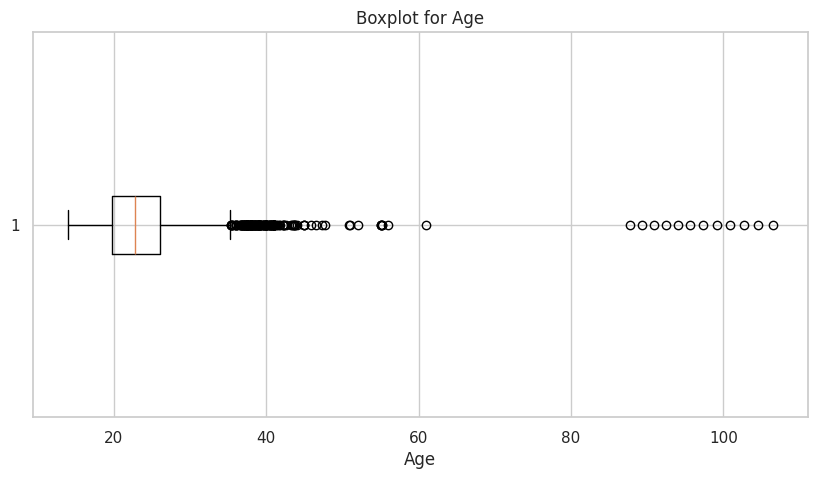

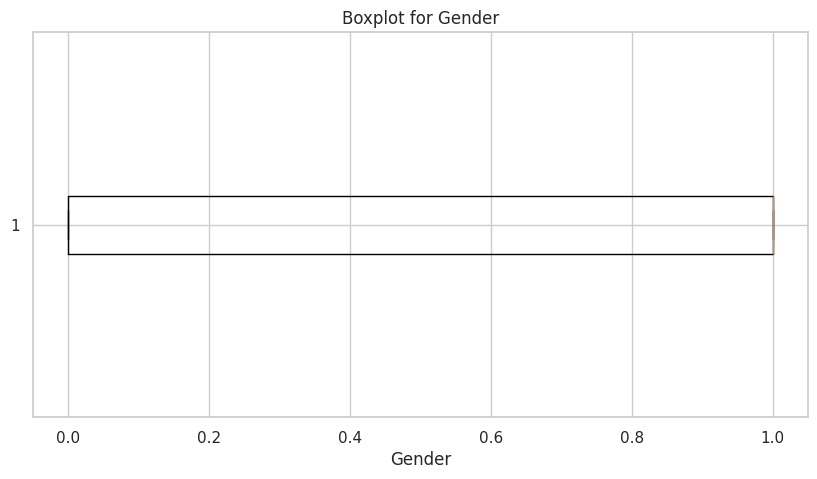

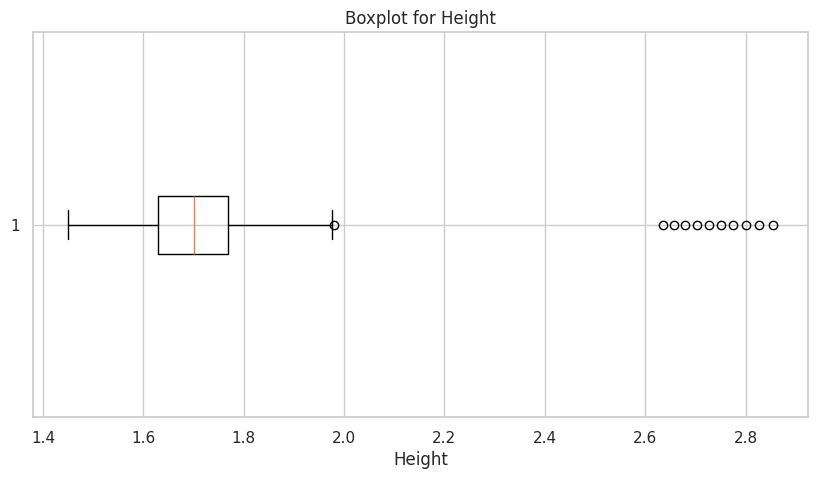

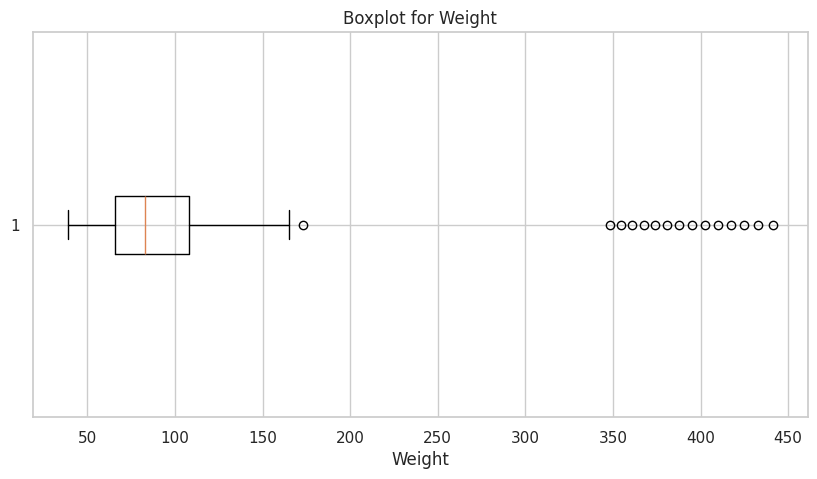

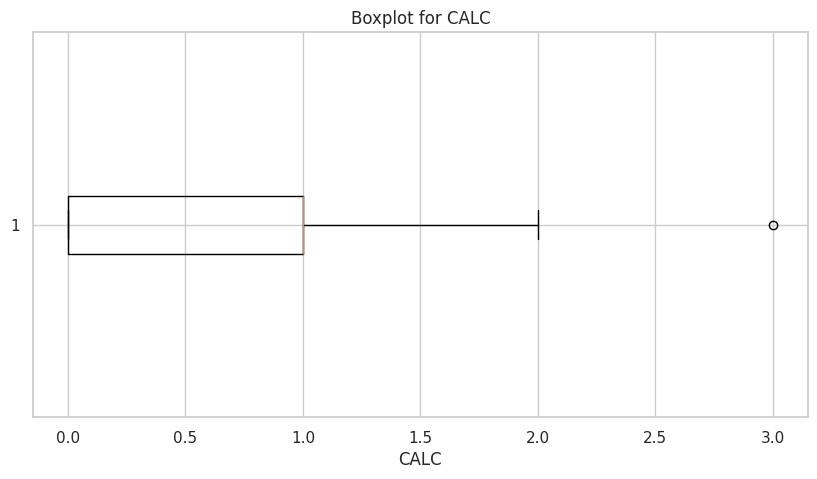

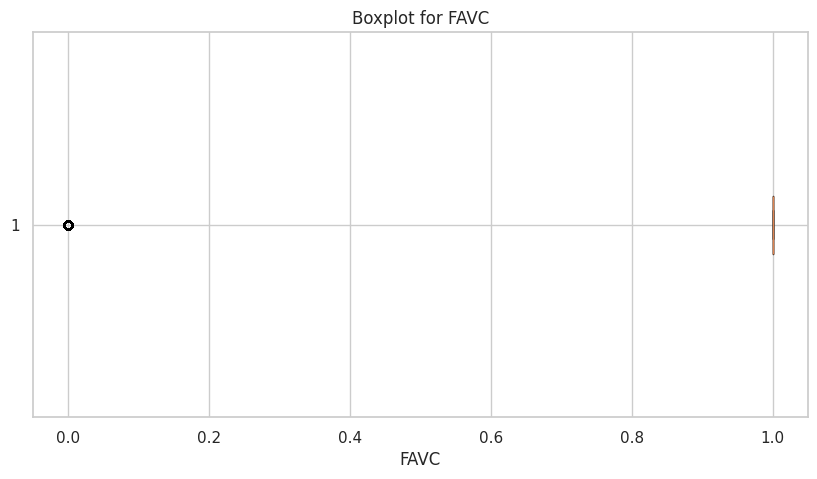

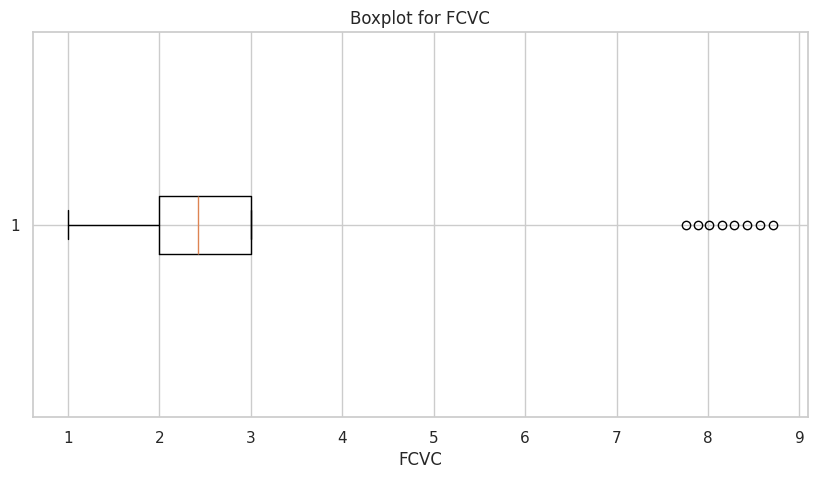

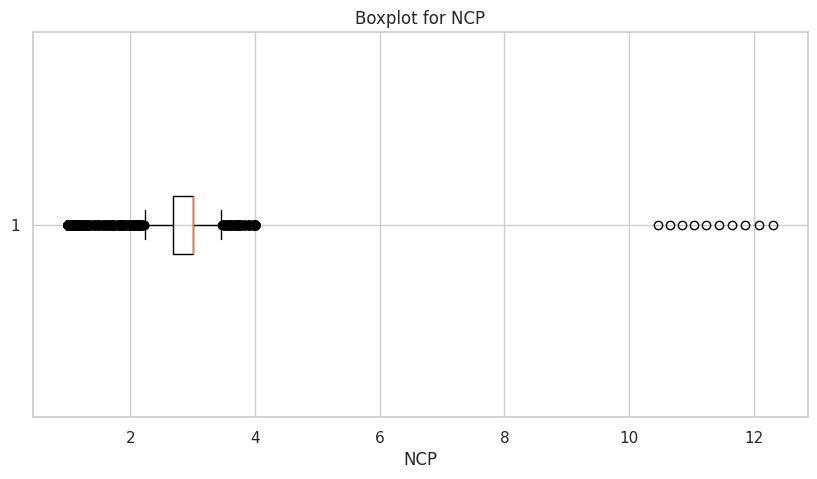

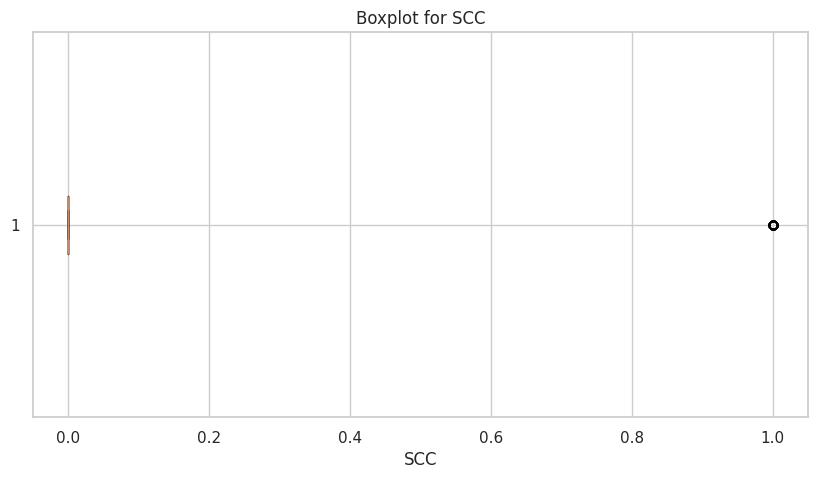

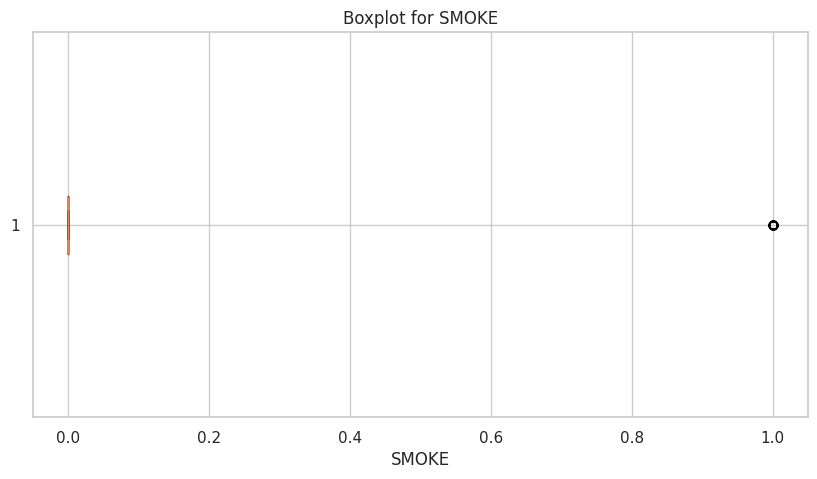

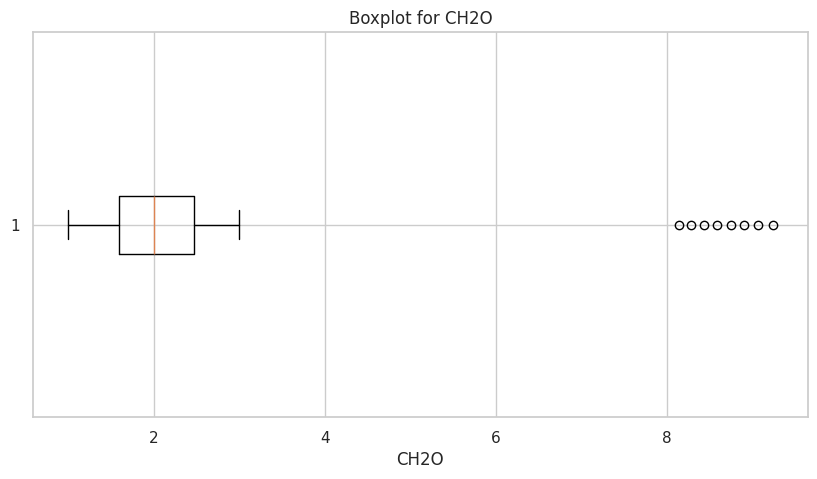

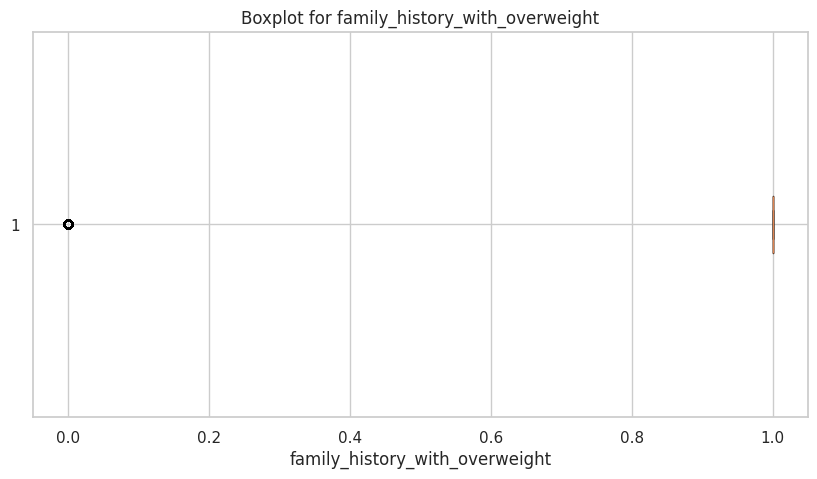

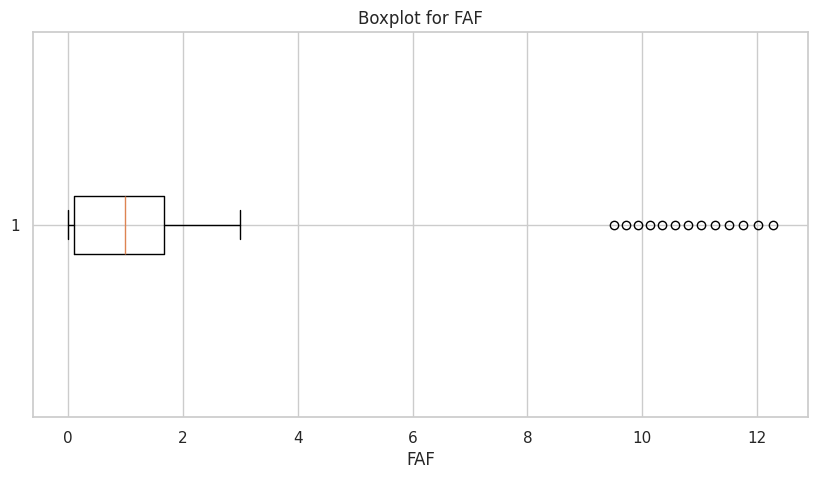

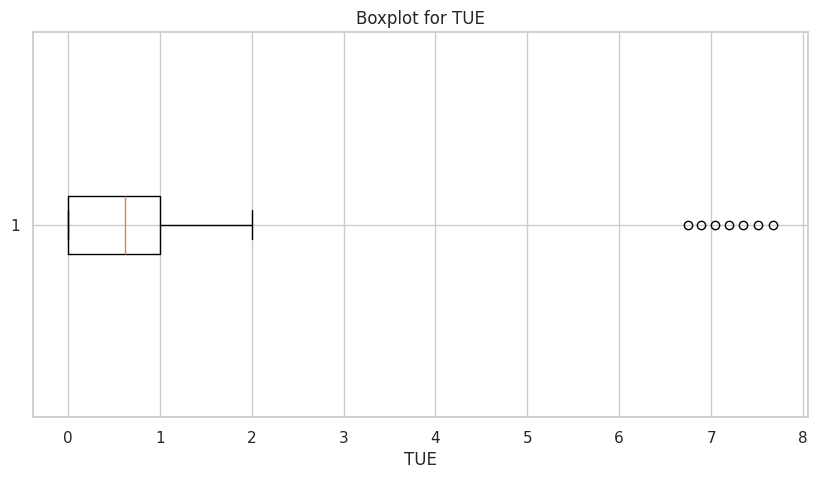

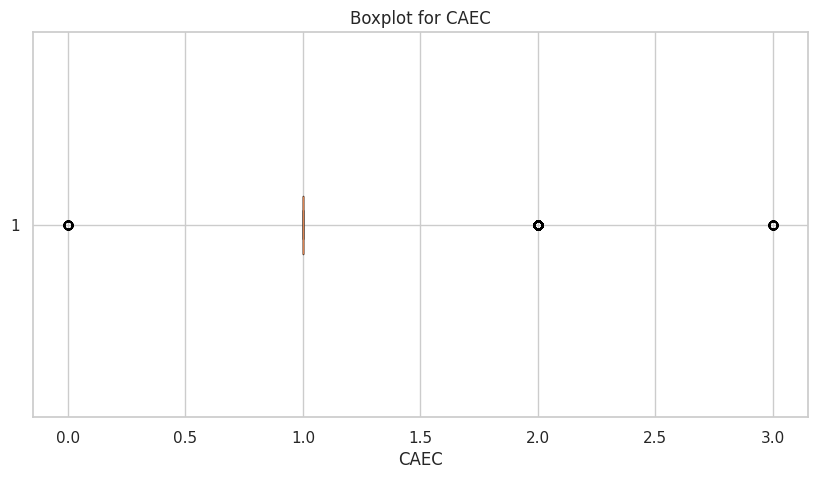

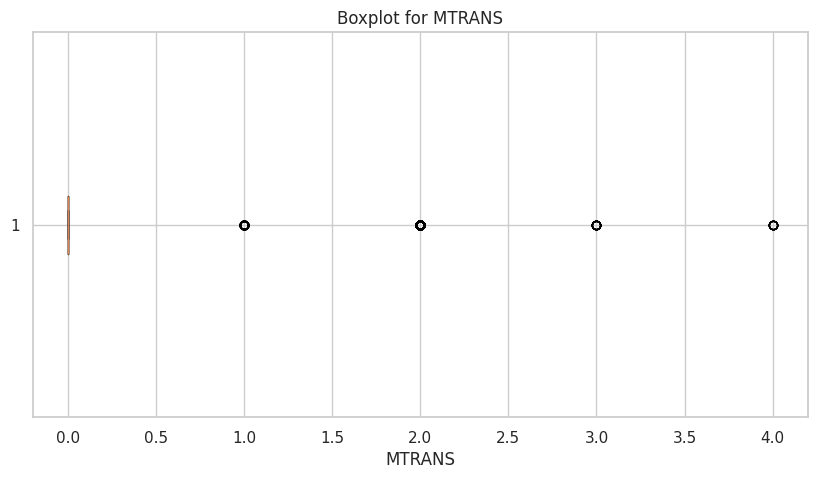

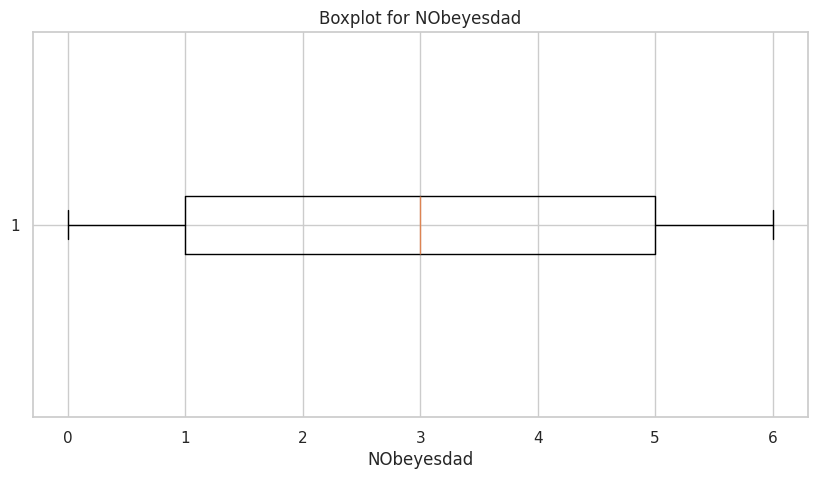

In [247]:
# Pilih hanya kolom numerik
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Buat boxplot untuk setiap kolom numerik
for col in numerical_cols:
    plt.figure(figsize=(10, 5))
    plt.boxplot(df[col], vert=False)
    plt.title(f'Boxplot for {col}')
    plt.xlabel(col)
    plt.show()

In [248]:
# Tangani outlier menggunakan metode IQR
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)  # Kuartil pertama
    Q3 = df[col].quantile(0.75)  # Kuartil ketiga
    IQR = Q3 - Q1  # Rentang interkuartil

    # Tentukan batas bawah dan atas
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Ganti outlier dengan nilai batas bawah atau atas
    df[col] = df[col].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))



print("Tipe data pada masing-masing kolom:")
print(df.dtypes)



Tipe data pada masing-masing kolom:
Age                               float64
Gender                            float64
Height                            float64
Weight                            float64
CALC                              float64
FAVC                              float64
FCVC                              float64
NCP                               float64
SCC                               float64
SMOKE                             float64
CH2O                              float64
family_history_with_overweight    float64
FAF                               float64
TUE                               float64
CAEC                              float64
MTRANS                            float64
NObeyesdad                          int64
dtype: object


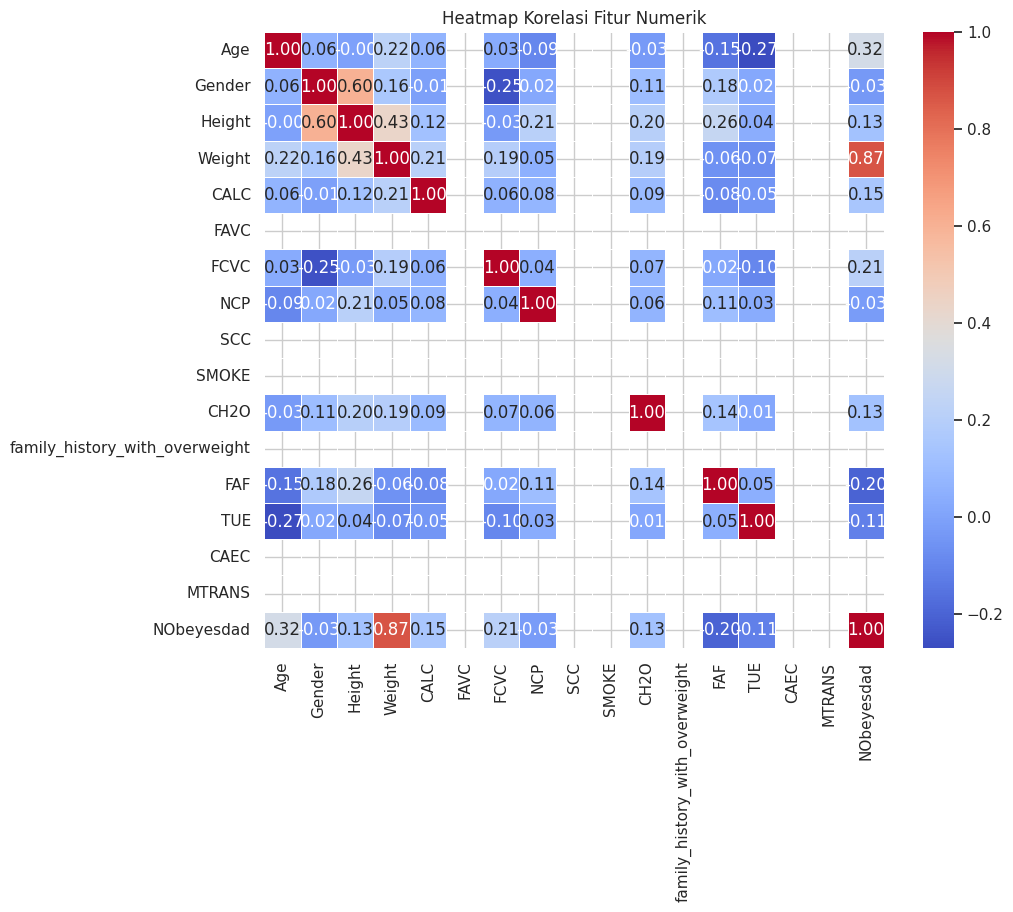

In [249]:
# Pilih hanya kolom numerik
numerical_df = df.select_dtypes(include=['int64', 'float64'])

# Hitung korelasi
correlation_matrix = numerical_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi Fitur Numerik")
plt.show()

In [250]:
# Korelasi antar kolom numerik
correlation_matrix = df.select_dtypes(include=['int64', 'float64']).corr()

# Cetak sebagai tabel biasa
print(correlation_matrix.round(2).to_markdown())


|                                |    Age |   Gender |   Height |   Weight |   CALC |   FAVC |   FCVC |    NCP |   SCC |   SMOKE |   CH2O |   family_history_with_overweight |    FAF |    TUE |   CAEC |   MTRANS |   NObeyesdad |
|:-------------------------------|-------:|---------:|---------:|---------:|-------:|-------:|-------:|-------:|------:|--------:|-------:|---------------------------------:|-------:|-------:|-------:|---------:|-------------:|
| Age                            |   1    |     0.06 |    -0    |     0.22 |   0.06 |    nan |   0.03 |  -0.09 |   nan |     nan |  -0.03 |                              nan |  -0.15 |  -0.27 |    nan |      nan |         0.32 |
| Gender                         |   0.06 |     1    |     0.6  |     0.16 |  -0.01 |    nan |  -0.25 |   0.02 |   nan |     nan |   0.11 |                              nan |   0.18 |   0.02 |    nan |      nan |        -0.03 |
| Height                         |  -0    |     0.6  |     1    |     0.43 |   0.12 |   

In [251]:
# Pastikan semua fitur sudah numerik
X = df.drop(columns=['NObeyesdad'])
y = df['NObeyesdad']
mi = mutual_info_classif(X, y, discrete_features='auto')
mi_series = pd.Series(mi, index=X.columns)
print(mi_series.sort_values(ascending=False))



Weight                            1.209718
Age                               0.555901
Height                            0.406596
FCVC                              0.389864
FAF                               0.283103
CH2O                              0.270877
TUE                               0.266764
NCP                               0.214830
Gender                            0.197914
CALC                              0.092914
family_history_with_overweight    0.031171
SMOKE                             0.014734
FAVC                              0.014381
CAEC                              0.001399
SCC                               0.000000
MTRANS                            0.000000
dtype: float64


| Fitur                     | Nilai MI | Keterangan                  |
| ------------------------- | -------- | --------------------------- |
| **Weight**                | **1.21** | Sangat penting              |
| **Age**                   | 0.56     | Penting                     |
| **Height**                | 0.41     | Cukup penting               |
| **FCVC** (makan sayur)    | 0.39     | Cukup penting               |
| **FAF** (aktivitas fisik) | 0.28     | Relevan                     |
| **CH2O** (minum air)      | 0.27     | Relevan                     |
| **TUE** (teknologi)       | 0.27     | Relevan                     |
| **NCP** (makan besar)     | 0.21     | Masih berkontribusi         |
| **Gender**                | 0.20     | Marginal, tapi bisa dipakai |
| `CALC` → `MTRANS`         | < 0.1    | Bisa diabaikan / low impact |


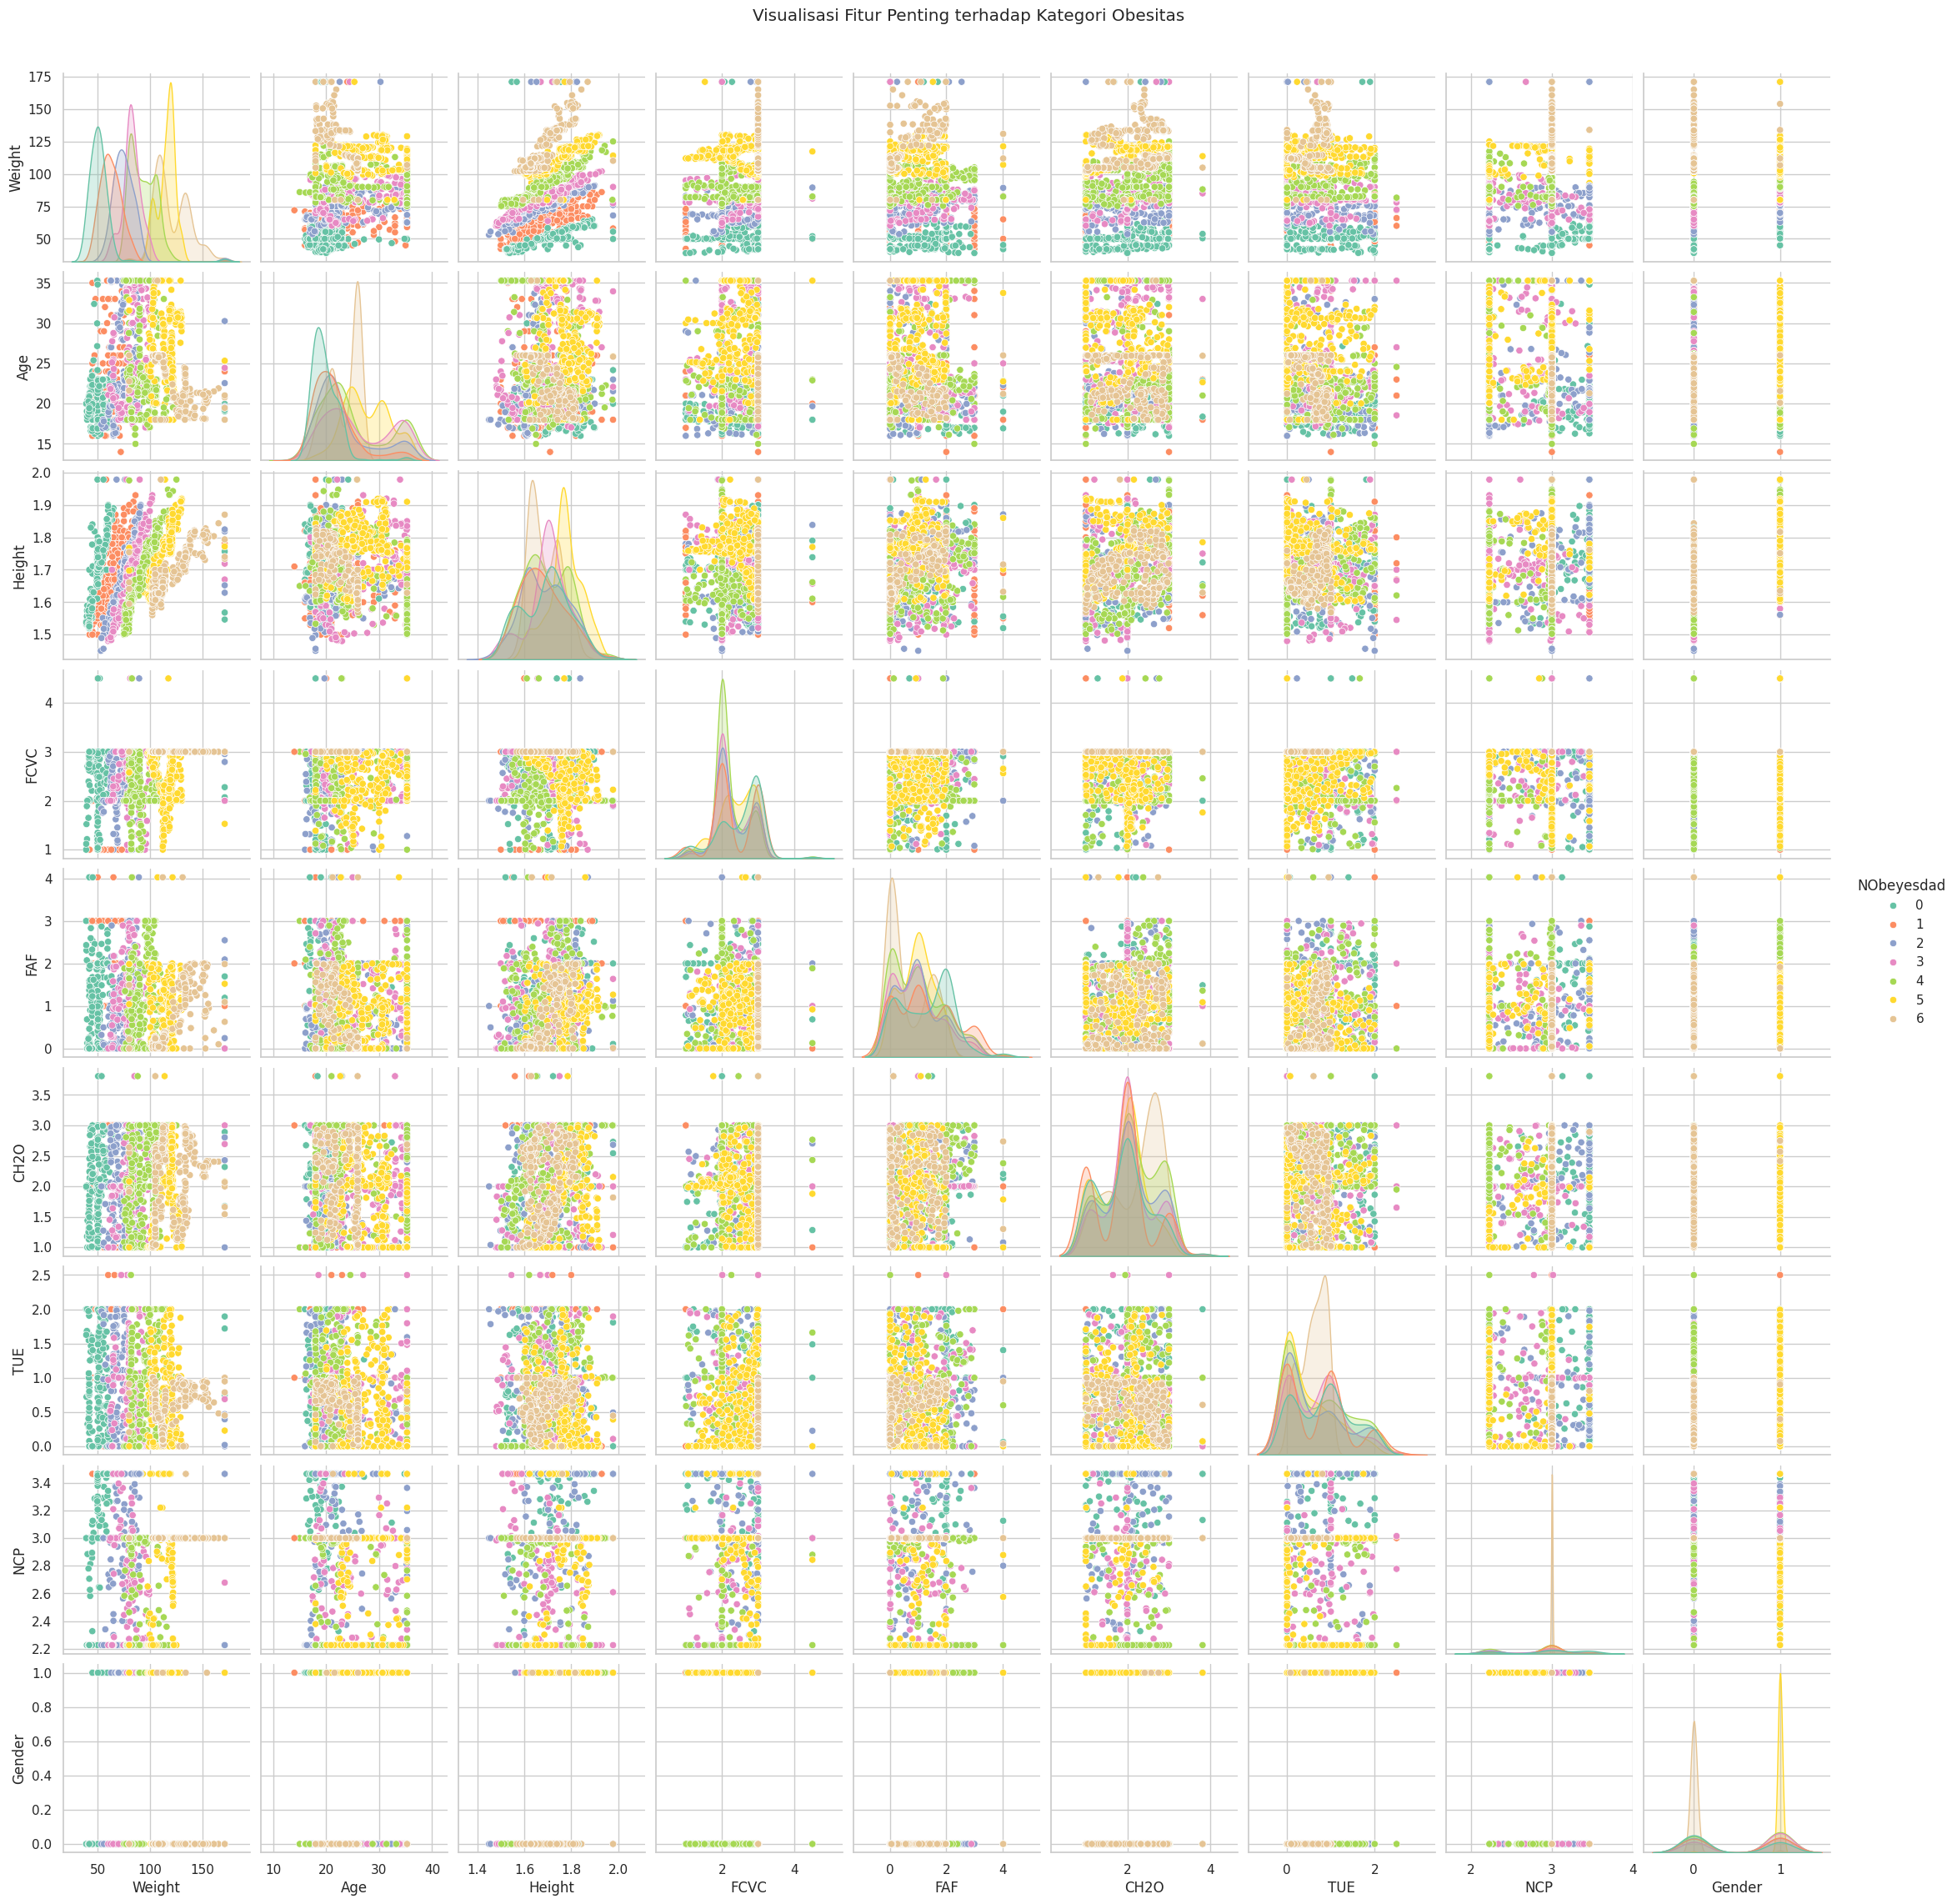

In [254]:

fitur_penting = ['Weight', 'Age', 'Height', 'FCVC', 'FAF', 'CH2O', 'TUE', 'NCP', 'Gender']

# Buat pairplot untuk visualisasi distribusi dan relasi antar fitur terhadap target
sns.pairplot(df[fitur_penting + ['NObeyesdad']], hue='NObeyesdad', palette='Set2', diag_kind='kde')
plt.suptitle("Visualisasi Fitur Penting terhadap Kategori Obesitas", y=1.02)
plt.show()